In [12]:
##Importing packages
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
##reading the image file
img=cv2.imread("image1.jpg")

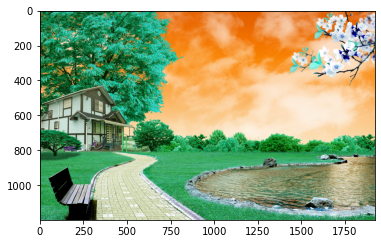

In [4]:
##actual image display
plt.imshow(img)

## 1.Topological operations
###  Finding distance between pixels

In [7]:
## Noting all the pixels at 20,50 and 30,40
b1,g1,r1=img[20,50]
b1,g1,r1

(12, 106, 52)

In [8]:
b2,g2,r2=img[30,40]
b2,g2,r2

(0, 115, 56)

In [10]:
##hence euclidean distance between pixels 12,106,52 and 0,115,56 is:
d=math.dist([20,50],[30,40])
d

14.142135623730951

## 2.Point Operations
### a.Image negatives

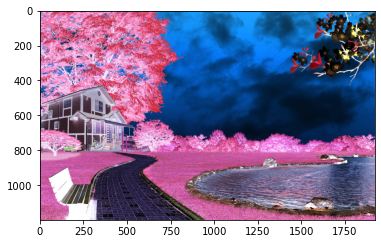

In [11]:
#We find the image negative finding finding the complement of the actual image by substracting it from the max range of pixels
#in the image
max=img.max()
img_negative=max-img
plt.imshow(img_negative)

### b.Image Transform - Power Law 

In [23]:
#power law comes from the formulae final intensity(s)=(c*initial intensity(r))**gamma.So in this piece of code we try with four
#gamma values to get the respective intensity images.As the gamma values go up the intensity increases exponentially,thus satisfying
#power law
# Trying 4 gamma values.
for gamma in [0.2, 0.8, 1.3, 2.7]:
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
    #Save edited images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)

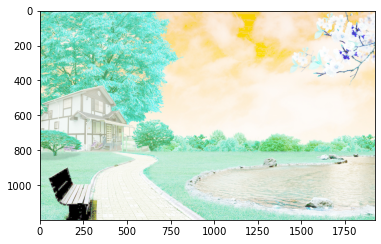

In [24]:
#Displaying the transformed 4 images gamma_tansformed0.2
plt.imshow(cv2.imread('gamma_transformed0.2.jpg'))

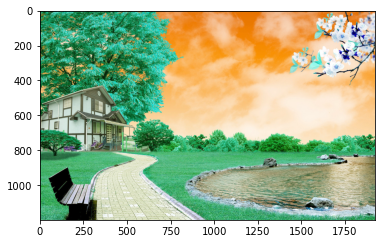

In [25]:
#Displaying the transformed 4 images gamma_tansformed0.8
plt.imshow(cv2.imread('gamma_transformed0.8.jpg'))

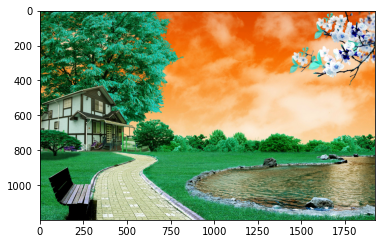

In [22]:
#Displaying the transformed 4 images gamma_tansformed1.3
plt.imshow(cv2.imread('gamma_transformed1.3.jpg'))

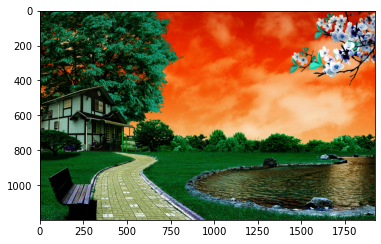

In [26]:
#Displaying the transformed 4 images gamma_tansformed2.7
plt.imshow(cv2.imread('gamma_transformed2.7.jpg'))

### c.Piece-wise-Linear Transformation Functions : Gray-level slicing, Contrast stretching 

#### Gray-level slicing

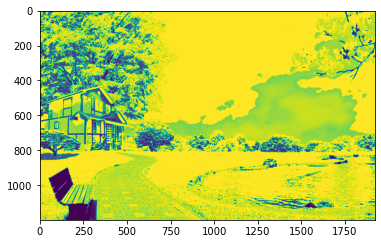

In [57]:
# in gray-level slicing we fix 2 values as upper and lower tthreshold values.if the pixel intensity falls in this range the pixels
# will be assigned with max intensity or else the deafult intensity.
img1=cv2.imread("image1.jpg",0)
# the lower threshold value
T1 = 80
# the upper threshold value
T2 = 200 
m,n=img1.shape  
# create a array of zeros
img_thresh_back = np.zeros((m,n), dtype = int)
   
for i in range(m):
      
    for j in range(n):
          
        if T1 < img1[i,j] < T2: 
            img_thresh_back[i,j]= 255
        else:
            img_thresh_back[i,j] = img1[i,j]
plt.imshow(img_thresh_back)

## 3.Neighbourhood operation  (neighbour size n*n)
### a.Use of Average neighbour value 

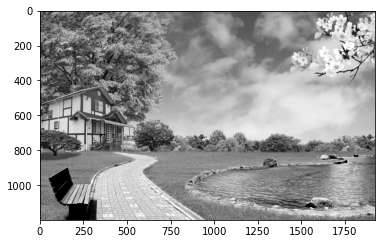

In [56]:
# convert the image into gray scale image for better visualisation on the distinction of neighbourhood operations
#In this average operation we are converting the given range pixels to the average complementary pixels
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
m,n,p=img.shape
#here neighbour size is 2 since it is n*n
neighbour_image_avg = gray_image
for i in range(m-2,2):
    for j in range(n-2,2):
        avg = np.average(neighbour_image_avg[i:2,j:2])
        neighbour_image_avg[i:2,j:2] = avg - neighbour_image_avg[i:2,j:2]
#Display the avg
plt.imshow(neighbour_image_avg,cmap='gray')

### b.Using Minimum neighbour

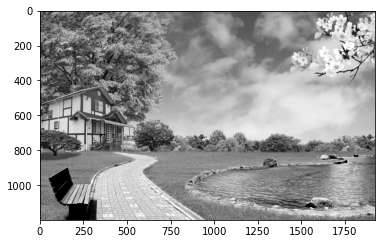

In [55]:
#There neighbour size is 2 since it is n*n
#In this minimum neighbour operation we are converting the pixels in the given range into minimum complementary images
neighbour_image_min = gray_image
for i in range(m-2,2):
    for j in range(n-2,2):
        min =neighbour_image_min[i:2,j:2].min()
        neighbour_image_min[i:2,j:2] = min - neighbour_image_min[i:2,j:2]
#Display the avg
plt.imshow(neighbour_image_min,cmap='gray')

## 4.Operations on set of images
### a.Arithmetic operations - Addition,  Division 
#### Addition

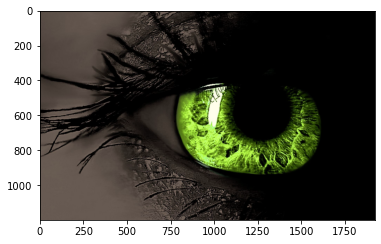

In [51]:
##  given images
img2=cv2.imread("image2.jpg")
plt.imshow(img2)

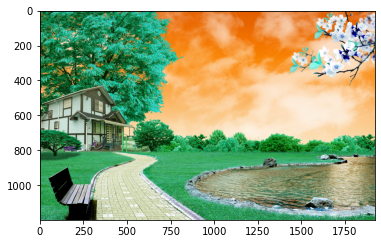

In [45]:
plt.imshow(img)

In [50]:
img.shape


(1200, 1920, 3)

In [52]:
img2.shape

(1200, 1920, 3)

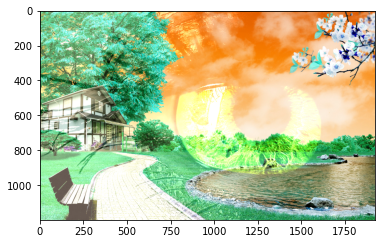

In [54]:
#adition operation
add_i= cv2.add(img,img2)
plt.imshow(add_i)

#### Divison

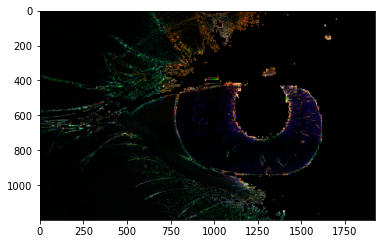

In [59]:
#division operation
divide_i= cv2.divide(img,img2)
plt.imshow(divide_i)

### b.Logical Operations on Binary Image - XOR, NOT 

#### XOR

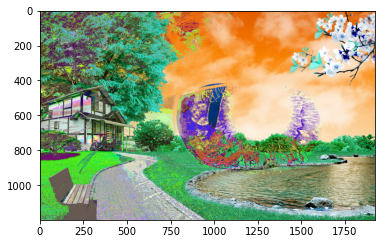

In [61]:
#logical opeartions
xor_i = cv2.bitwise_xor(img,img2)
plt.imshow(xor_i)

#### NOT

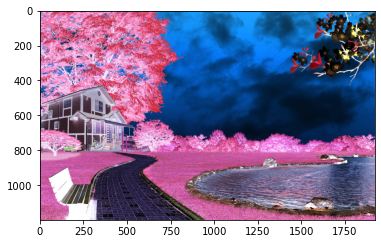

In [62]:
#logical opeartions
not_i = cv2.bitwise_not(img,img2)
plt.imshow(not_i)

### c.Geometrical Operations -  Rotation, Affine Translation  

#### Rotation

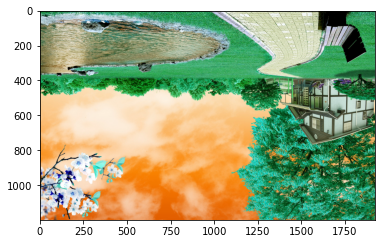

In [63]:
#Rotation of img by 180 degress
im = cv2.rotate(img, cv2.ROTATE_180)
plt.imshow(im)

####  Affine Translation

In [64]:
m,n,p

(1200, 1920, 3)

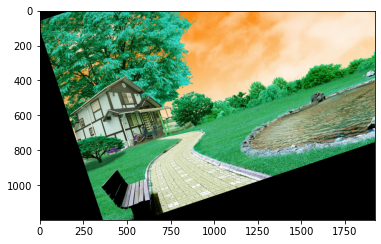

In [69]:
##This transformation takes place by taking 2 matrices and finally using Affine function transform them with respect to those 
#matrices and use wrap Affine Function
p1 = np.float32([[50, 50],
                   [200, 50], 
                   [50, 200]])
  
p2 = np.float32([[50, 100],
                   [200, 50], 
                   [100, 250]])
  
m1= cv2.getAffineTransform(p1, p2)
d = cv2.warpAffine(img, m1, (n,m))
plt.imshow(d)

### d.Statistical operations - Mean, Variance
#### Mean

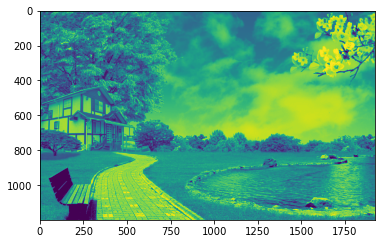

In [70]:
mean = np.mean(gray_image)
mean_img = mean + gray_image
plt.imshow(mean_img)

#### Variance

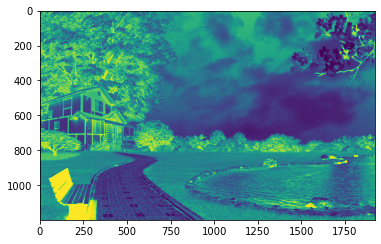

In [71]:
var = np.var(gray_image)
var_img = var-gray_image
plt.imshow(var_img)

#### e.Image Interpolation - Down sampling

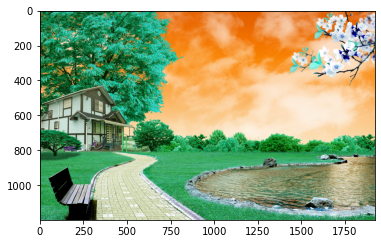

In [75]:
#Image shape before downsampling and image
plt.imshow(img)

In [76]:
img.shape

(1200, 1920, 3)

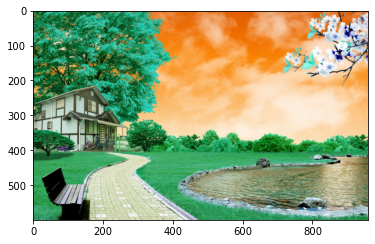

In [77]:
#Image shape after downsampling and image
img=cv2.pyrDown(img)
plt.imshow(img)

In [78]:
img.shape

(600, 960, 3)

## Thank you